# Assignment 4b

## Regularised logistic regression

### Predict whether microchips from a fabrication plant passes quality assurance

In [2]:
import numpy as np
data = np.genfromtxt('ex2data2.txt', delimiter = ",")
m = len(data[:,0])
y = data[:, 2].reshape((m, 1))
X = np.ones((m,3))
X[:, 1:] = data[:, 0:2]

##### Visualizing the data

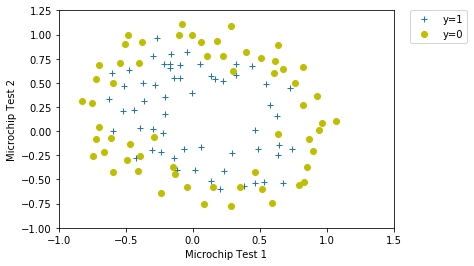

In [3]:
pos = []
neg = []
for i in range(0, m):
    if y[i] == 1:
        pos.append(i)
    else:
        neg.append(i)
import matplotlib.pyplot as plt
plt.plot(X[pos, 1], X[pos, 2], '+', label = "y=1")
plt.plot(X[neg, 1], X[neg, 2], 'yo', label = "y=0")
plt.axis([-1, 1.5, -1, 1.25])

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### Feature Mapping
One way to fit the data better is to create more features from each data point. The function mapFeature, maps the features into all polynomial terms of x1 and x2 up to the sixth power. As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector.

In [4]:
def mapFeature(X1, X2):
    if isinstance(X1, np.float64) :
        l = 1
    else:
        l = len(X1)
    X1.reshape((l, 1))
    X2.reshape((l, 1))
    degree = 6
    out = np.ones((l, 28))
    k = 1
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            out[:, k] = (np.power(X1, (i-j))) * np.power(X2, j)
            k = k + 1     
    return out        

In [5]:
X = mapFeature(X[:, 1], X[:, 2])

##### Sigmoid function

In [6]:
def sigmoid(z):
    neg_z = np.negative(z)
    exp_z = np.exp(neg_z)
    den = np.add(1, exp_z)
    return np.reciprocal(den)

##### Cost function

In [7]:
def cost():
    z = np.dot(X, theta)
    h = sigmoid(z)
    # if sigmoid function gives error uncomment the 2 statements below and comment the statement above
    #from scipy.special import expit
    #h = expit(z)
    t1 = -1 * y * np.log(h)
    t2 = (y - 1) * np.log(1 - h)
    sum_ = np.sum(t1 + t2)
    sq_theta = theta[1:, 0] * theta[1:, 0]
    sum_sq_theta = np.sum(sq_theta)
    J = (sum_ + (lambda_ * sum_sq_theta)/2) / m 
    return J

##### Gradient function

In [8]:
def dif_cost():
    n = len(theta)
    grad = np.zeros((n, 1))
    new_grad = np.zeros((n, 1))
    z = np.dot(X, theta)
    h = sigmoid(z)
    # if sigmoid function gives error uncomment the 2 statements below and comment the statement above
    #from scipy.special import expit
    #h = expit(z)
    for j in range(0, n):
        x = np.zeros((m,1))
        x[:,0] = X[:,j]
        t = (h - y) * x 
        sum_ = np.sum(t)
        grad[j, 0] = sum_ / m
    new_grad[0,0] = grad[0,0] 
    new_grad[1:, 0] = grad[1:, 0] + lambda_ * theta[1:,0] / m   
    return new_grad    

##### Initialize theta values and lambda

In [9]:
theta = np.zeros((28, 1))
lambda_ = 1

##### Training

In [10]:
no_iter = 1000
alpha = 1
for i in range(1, no_iter):
    grad = dif_cost()
    theta = theta - alpha * grad

##### Accuracy

In [13]:
z_pred = np.dot(X, theta)
pred = sigmoid(z_pred)
# if sigmoid function gives error uncomment the 2 statements below and comment the statement above
#from scipy.special import expit
#pred = expit(z_pred)
for i in range(0,m):
    if(pred[i, 0] >= 0.5):
        pred[i, 0] = 1
    else:
        pred[i, 0] = 0     
count = 0
for i in range(0,m):
    if(pred[i, 0] == y[i, 0]):
        count = count + 1
accuracy = 100 * count / m
print("Accuracy : {0:.2f} %".format(accuracy))

Accuracy : 83.05 %


##### Plotting decision boundary

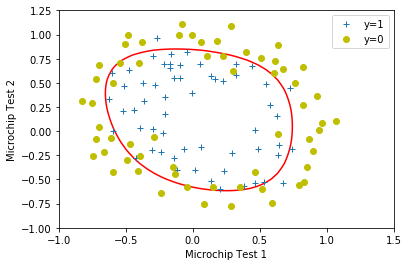

In [14]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
for i in range(1, len(u)):
    for j in range(1, len(v)):
        z[i, j] = np.dot(mapFeature(u[i], v[j]), theta);
z = np.transpose(z) 
pos = []
neg = []
for i in range(0, m):
    if y[i] == 1:
        pos.append(i)
    else:
        neg.append(i)
import matplotlib.pyplot as plt
plt.plot(X[pos, 1], X[pos, 2], '+', label = "y=1")
plt.plot(X[neg, 1], X[neg, 2], 'yo', label = "y=0")
plt.contour(u, v, z, 0, colors = 'r')
plt.axis([-1, 1.5, -1, 1.25])

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()
plt.show()